# CIS 519 Final Project



Intro


Data Source: https://www.kaggle.com/datasets/parisrohan/credit-score-classification


# Loading Packages & Data Processing

In [ ]:
!pip3 install pandas==1.1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.3 MB 4.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 26.6 MB/s 
     |████████████████████████████████| 1.6 MB 54.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import Sequential, layers, initializers, losses, optimizers, regularizers

In [ ]:
import csv
raw_df = pd.read_csv("cleaned_dataset.csv")
# make a copy of dataset in case we modify the original data
df = raw_df
# Will split train-test-validation in future steps

In [ ]:
df.shape

(100000, 24)

In [ ]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [ ]:
df.head(25)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Length
0,3,23,12,19114.12,1824.84,3,4,0.03,4,3,...,3,809.98,26.82,0,49.57,80.42,2,312.49,0,22.1
1,2,23,12,19114.12,1824.84,3,4,0.03,4,-1,...,1,809.98,31.94,0,49.57,118.28,3,284.63,0,22.1
2,6,33,12,19114.12,1824.84,3,4,0.03,4,3,...,1,809.98,28.61,0,49.57,81.70,4,331.21,0,22.2
3,0,23,12,19114.12,1824.84,3,4,0.03,4,5,...,1,809.98,31.38,0,49.57,199.46,5,223.45,0,22.3
4,7,23,12,19114.12,1824.84,3,4,0.03,4,6,...,1,809.98,24.80,0,49.57,41.42,1,341.49,0,22.4
5,5,23,12,19114.12,1824.84,3,4,0.03,4,8,...,1,809.98,27.26,0,49.57,62.43,6,340.48,0,22.5
6,4,23,12,19114.12,1824.84,3,4,0.03,4,3,...,1,809.98,22.54,0,49.57,178.34,5,244.57,0,22.6
7,1,23,12,19114.12,1824.84,3,4,0.03,4,3,...,1,809.98,23.93,0,49.57,24.79,1,358.12,2,22.6
8,3,28,11,34847.84,3037.99,2,4,0.06,1,3,...,1,605.03,24.46,0,18.82,104.29,5,470.69,2,26.6
9,2,28,13,34847.84,3037.99,2,4,0.06,1,7,...,1,605.03,38.55,0,18.82,40.39,0,484.59,0,26.7


In [ ]:
df.isna().sum()

Month                        0
Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Length    0
dtype: int64

In [ ]:
df.dtypes

Month                          int64
Age                            int64
Occupation                     int64
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                    int64
Delay_from_due_date            int64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                     int64
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount          int64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour              int64
Monthly_Balance              float64
Credit_Score                   int64
Credit_History_Age_Length    float64
dtype: object

## Data Preprocessing


Age Column

In [ ]:
# remove underscores
# switch the data type to 'str' then use str.replace() to replace '_' with ''
def remove_underscore(columns):
    for c in columns:
        df[c] = df[c].astype(str)
        df[c] = df[c].str.replace('_','')
        df[c] = df[c].str.replace('_','')

remove_underscore(['Age','Occupation','Annual_Income','Num_of_Loan','Type_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Credit_Mix',
                   'Outstanding_Debt','Credit_History_Age','Payment_of_Min_Amount','Amount_invested_monthly','Payment_Behaviour',
                   'Monthly_Balance','Credit_Score'])

In [ ]:
df.head(6)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,nan,No,49.574949,118.28022162236736,LowspentLargevaluepayments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good


In [ ]:
df['Age'] = df['Age'].astype(float)
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

ValueError: ignored

# Modeling



In [ ]:
# train-test split
X = df.drop(['Credit_Score'], axis = 1)
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# predict
predictions = gnb.predict(X_test)

In [ ]:
# performance evaluation
accuracy = accuracy_score(y_test, predictions)*100
precision = precision_score(y_test, predictions, average = 'weighted')*100
recall = recall_score(y_test, predictions, average = 'weighted')*100

print('The accuracy of Naive Bayes {} %.'.format(accuracy))
print('The precision of Naive Baye {} %.'.format(precision))
print('The recall of Naive Baye {} %.'.format(recall))

# result in last run
# The accuracy of Naive Bayes 59.01 %.
# The precision of Naive Baye 65.78467096404631 %.
# The recall of Naive Baye 59.01 %.

The accuracy of Naive Bayes 54.80500000000001 %.
The precision of Naive Baye 54.10601279179541 %.
The recall of Naive Baye 54.80500000000001 %.


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.32      0.28      0.30      3527
           1       0.58      0.55      0.57      5874
           2       0.59      0.64      0.61     10599

    accuracy                           0.55     20000
   macro avg       0.50      0.49      0.49     20000
weighted avg       0.54      0.55      0.54     20000



In [ ]:
X_train

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Length
75220,7,20,6,101399.13,8535.93,1,3,0.02,2,14,...,4.0,1,1061.06,42.68,0,132.67,114.30,1,856.62,24.8
48955,0,25,0,112882.68,9684.89,5,1,0.10,4,12,...,0.0,1,722.90,40.09,0,353.62,166.45,0,688.43,28.9
44966,4,49,12,28101.46,2173.46,5,7,0.08,3,28,...,4.0,2,454.67,23.61,0,268.27,97.06,5,242.92,26.8
13568,3,34,8,22438.27,1856.86,7,7,0.09,4,16,...,3.0,3,167.57,27.09,0,58.44,105.17,3,292.08,9.2
92727,1,28,10,20975.40,1943.95,2,3,0.09,1,2,...,1.0,1,731.40,26.21,1,16.20,67.16,1,361.04,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,46,2,82065.16,6771.76,5,5,0.03,3,12,...,1.0,1,106.83,35.13,0,180.34,439.84,2,317.00,23.0
54886,4,20,0,14920.97,1424.41,6,10,0.16,2,61,...,12.0,2,1288.58,33.57,1,19.91,110.08,5,302.45,13.4
76820,7,38,8,66858.27,5770.52,3,6,0.13,4,8,...,4.0,2,601.58,37.98,1,175.02,364.71,4,317.33,28.1
860,7,55,3,19403.40,1904.95,1,7,0.03,3,12,...,2.0,3,339.11,36.83,0,39.21,169.86,3,251.42,16.7


#### Dimension Reduction with PCA

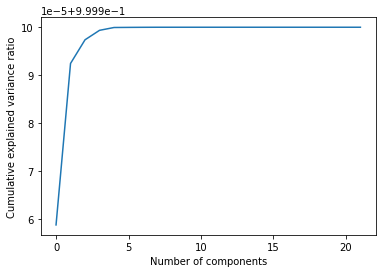

[9.99958850e-01 3.36153654e-05 4.92291379e-06 1.96985299e-06
 5.87979600e-07 2.43147828e-08 1.78841499e-08 1.12579871e-08
 7.14964863e-11 4.35475719e-11 2.13543179e-11 1.51938738e-11
 1.17463220e-11 8.75550450e-12 2.51204056e-12 1.76481477e-12
 1.47488253e-12 1.28420967e-12 1.00808408e-12 4.08813033e-13
 6.08464071e-14 9.47343981e-16]


In [ ]:
# fit a PCA model on the training data and plot the explained_variance_ratio against the number of components to decide the number of components we want to keep
# fit pca model
pca = PCA(n_components=22)
pca.fit(X_train)

# explain variance
variance = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.plot(variance)
plt.show()
print(pca.explained_variance_ratio_)

In [ ]:
### TODO: decide the number of components, which should explains at least 95% of variance in the dataset
pca = PCA(n_components=3)
X_train_pca = pca.fit(X_train).transform(X_train)
X_test_pca = pca.transform(X_test)

#### Logistic Regression


In [ ]:
# logistic regression with dataset before applying PCA
# data scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

predictions = lr_clf.predict(X_test)

In [ ]:
# measure model performance
y_predict_prob = lr_clf.predict_proba(X_test)
print('predicted probabilities: %s for Good Standard Poor credit score respectively' % y_predict_prob[0])

# performance evaluation
accuracy = lr_clf.score(X_test, y_test)*100
precision = precision_score(y_test, predictions, average = 'weighted')*100
recall = recall_score(y_test, predictions, average = 'weighted')*100

print('The accuracy of Logistic Regression {} %.'.format(accuracy))
print('The precision of Logistic Regression {} %.'.format(precision))
print('The recall of Logistic Regression {} %.'.format(recall))

predicted probabilities: [0.42127841 0.10935384 0.46936775] for Good Standard Poor credit score respectively
The accuracy of Logistic Regression 62.59 %.
The precision of Logistic Regression 62.53468129637878 %.
The recall of Logistic Regression 62.59 %.


‘newton-cg’ - [‘l2’, ‘none’]

‘lbfgs’ - [‘l2’, ‘none’]

‘liblinear’ - [‘l1’, ‘l2’]

‘sag’ - [‘l2’, ‘none’]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. 

In [ ]:
# # L2 regularization (Ridge)
L2 = LogisticRegression(penalty='l2')
L2.fit(X_train, y_train)
  
# predicting the y_test
y_pred = L2.predict(X_test)
  
# finding score for our model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.45      0.50      3527
           1       0.65      0.47      0.54      5874
           2       0.63      0.77      0.69     10599

    accuracy                           0.63     20000
   macro avg       0.62      0.56      0.58     20000
weighted avg       0.63      0.63      0.62     20000



In [ ]:
# use Confusion Matrix to describe the performance of our classifier
cm = metrics.confusion_matrix(y_test, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
# reference: https://www.kaggle.com/code/nagavenkatesh/credit-score-classification-logistic-regression

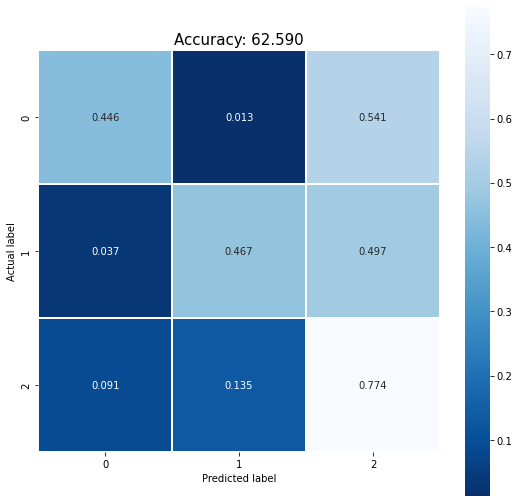

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy: {:.3f}'.format(accuracy) 
plt.title(all_sample_title, size = 15);

In [ ]:
# apply PCA to logistic regression to remove multicollinearity
lr_clf.fit(X_train_pca, y_train)

# predictions
y_predict_train = lr_clf.predict(X_train_pca)
y_predict_test = lr_clf.predict(X_test_pca)

# performance evaluate
train_score = accuracy_score(y_train, y_predict_train) *100
test_score = accuracy_score(y_test, y_predict_test)

print("Train Data Accuracy ",str(train_score)+'%')
print("Test Data Accuracy ",str(test_score)+'%')

Train Data Accuracy  29.043750000000003%
Test Data Accuracy  0.29185%


In [ ]:
# observe performance by class 
pd.crosstab(y_test, y_predict_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,All
Actual,,,,
0,1690,1828,9,3527
1,1749,4103,22,5874
2,4171,6384,44,10599
All,7610,12315,75,20000


#### KNN

In [ ]:
### TODO separate the numerical and categorical columns for scaling purpose
numerical_cols = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age_Length']
categorical_cols = ['Month','Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']

x_numerical = X_train[numerical_cols]
x_categorical = X_train[categorical_cols]
#x_categorical = X_train[X_train.columns.intersection(categorical_cols)]

# knn reference to this post
# https://www.kaggle.com/code/saumitgp/credit-score-classification-knn

In [ ]:
# scale the numerical columns
cols_for_scaled = ['Annual_Income', 
                   'Monthly_Inhand_Salary', 
                   'Outstanding_Debt', 
                   'Credit_Utilization_Ratio',  
                   'Total_EMI_per_month', 
                   'Amount_invested_monthly']
                   
scaler = MinMaxScaler()
x_numerical_scaled = pd.DataFrame(scaler.fit_transform(x_numerical[cols_for_scaled]), 
                                  index=x_numerical[cols_for_scaled].index, 
                                  columns=x_numerical[cols_for_scaled].columns)

# replace the unscaled columns with the scaled columns
x_numerical[cols_for_scaled] = x_numerical_scaled
x_numerical

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Length
75220,20,0.003902,0.552466,1,3,0.02,2,14,6.0,4.97,4.0,0.212258,0.756000,0.001611,0.011430,856.62,24.8
48955,25,0.004377,0.629572,5,1,0.10,4,12,10.0,6.24,0.0,0.144596,0.669667,0.004295,0.016645,688.43,28.9
44966,49,0.000872,0.125482,5,7,0.08,3,28,8.0,1.85,4.0,0.090927,0.120333,0.003258,0.009706,242.92,26.8
13568,34,0.000638,0.104235,7,7,0.09,4,16,13.0,11.24,3.0,0.033482,0.236333,0.000710,0.010517,292.08,9.2
92727,28,0.000577,0.110080,2,3,0.09,1,2,9.0,9.94,1.0,0.146297,0.207000,0.000197,0.006716,361.04,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,46,0.003103,0.434073,5,5,0.03,3,12,9.0,5.55,1.0,0.021329,0.504333,0.002190,0.043984,317.00,23.0
54886,20,0.000327,0.075214,6,10,0.16,2,61,16.0,13.48,12.0,0.257781,0.452333,0.000242,0.011008,302.45,13.4
76820,38,0.002474,0.366880,3,6,0.13,4,8,10.0,4.16,4.0,0.120322,0.599333,0.002126,0.036471,317.33,28.1
860,55,0.000512,0.107463,1,7,0.03,3,12,9.0,3.90,2.0,0.067805,0.561000,0.000476,0.016986,251.42,16.7


In [ ]:
# combine numerical data with categorical data
x_merged = x_numerical.join(x_categorical)

In [ ]:
# parameter tuning for n, weights, and p
classifier = KNeighborsClassifier(n_jobs=-1)
parameter = {
    'n_neighbors': range(1,41,20),
    'weights' : ['uniform', 'distance'],
    'p' : [1, 2] # manhattan or euclidean
}

model = GridSearchCV(classifier, 
                     param_grid=parameter,
                     cv=3,
                     n_jobs=1,
                     scoring='accuracy', 
                     verbose=10)

model.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START n_neighbors=1, p=1, weights=uniform.........................


KeyboardInterrupt: ignored

In [ ]:
# best parameter for knn algorithms
model.best_params_

In [ ]:
# best accuracy for knn algorithms
model.best_score_

#### Decision Tree

In [ ]:
from sklearn.tree  import DecisionTreeClassifier as dtClassifier

In [ ]:
dt =DecisionTreeClassifier(max_features = 20,max_depth = 10)

In [ ]:
#fit the model with decision tree classifier
dt.fit(X_train , y_train)

In [ ]:
dt_score_train=dt.score(X_train , y_train)
dt_score_train

In [ ]:
dt_score_test=dt.score(X_test , y_test)
dt_score_test

In [ ]:
#use Confusion Matrix to evaluate the classification 

predicted = dt.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Poor', 'Standard','Good'])
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
cm_display.plot(ax=ax)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_features = 20 , max_depth = 10)

In [ ]:
#fit the model with random forest classifier
rf.fit(X_train , y_train)

In [ ]:
rf_score_train = rf.score(X_train , y_train)
rf_score_train

In [ ]:
rf_score_train = rf. score(X_test , y_test)
rf_score_train

In [ ]:
#use Confusion Matrix to evaluate the classification 
predicted = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Poor', 'Standard','Good'])
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
cm_display.plot(ax=ax)

#### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [ ]:
xgb.fit(X_train , y_train)

In [ ]:
xgb_score_train=xgb.score(X_train , y_train)
xgb_score_train

In [ ]:
xgb_score_test=xgb.score(X_test , y_test)
xgb_score_test

In [ ]:
#use Confusion Matrix to evaluate the classification 
predicted = xgb.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Poor', 'Standard','Good'])
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
cm_display.plot(ax=ax)

#### Neural Network

In [ ]:
# add validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state= 42)

In [ ]:
# Scaling
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# reference: https://www.kaggle.com/code/clausnesrbesolbakken/credit-score-classification-with-neural-network

In [ ]:
# Number of layers: [1, 2]
# Number of neurons per layer: [250, 500]
# Learning rates: [0.01, 0.001]
# A dropout layer with 0.8 as dropout rate is added before the output layer.

In [ ]:
initializer = initializers.HeNormal()
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


def build_model(hp):
    model = Sequential()
    model.add(layers.Flatten())
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=250,
                                            max_value=500,
                                            step=250),
                               activation='relu',
                                            ))
        model.add(layers.Dropout(0.8))

    model.add(layers.Dense(3, kernel_initializer=initializer, activation='softmax'))

    model.compile(
      optimizer=optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3])),
        loss=losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy'])
    
    return model

tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=10,
    directory='keras_tuner',
    project_name="3class_classification",
    overwrite=True
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[stop_early])

# results in last run
# Trial 30 Complete [00h 00m 58s]
# val_accuracy: 0.6271176338195801
# Best val_accuracy So Far: 0.6671176552772522
# Total elapsed time: 00h 24m 41s

Trial 30 Complete [00h 00m 58s]
val_accuracy: 0.6271176338195801

Best val_accuracy So Far: 0.6671176552772522
Total elapsed time: 00h 24m 41s


In [ ]:
best_model = tuner.get_best_models()[0]

y_pred_prob = best_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print(tf.math.confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

# result in last run
#               precision    recall  f1-score   support

#            0       0.51      0.69      0.59      2627
#            1       0.71      0.60      0.65      4421
#            2       0.72      0.70      0.71      7952

#     accuracy                           0.67     15000
#    macro avg       0.65      0.66      0.65     15000
# weighted avg       0.68      0.67      0.67     15000

469/469 [==============================] - 2s 3ms/step
tf.Tensor(
[[1809   27  791]
 [ 416 2665 1340]
 [1327 1082 5543]], shape=(3, 3), dtype=int32)

              precision    recall  f1-score   support

           0       0.51      0.69      0.59      2627
           1       0.71      0.60      0.65      4421
           2       0.72      0.70      0.71      7952

    accuracy                           0.67     15000
   macro avg       0.65      0.66      0.65     15000
weighted avg       0.68      0.67      0.67     15000

